# 1) Importing libaries

In [602]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [603]:
df=pd.read_csv("laptop_price.csv",encoding =('ISO-8859-1'))

# 2) Data preprocessing

In [604]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [605]:
df.shape

(1303, 13)

In [606]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


## a) Checking duplicate value 

In [607]:
df.duplicated().sum()

0

## b) Checking null

In [608]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [609]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


## c) Removing unwanted column

In [610]:
df.drop(columns=['laptop_ID'],inplace=True)

In [611]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## d) Removing GB and Kg 

In [612]:
df['Ram']=df['Ram'].str.replace('GB','')

In [613]:
df['Weight']=df['Weight'].str.replace('kg','')

In [614]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


## e) Changing data type

In [615]:
df['Ram']=df['Ram'].astype('int32')

In [616]:
df['Weight']=df['Weight'].astype('float32')

In [617]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price_euros       1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(8)
memory usage: 112.1+ KB


## f) Changing name of column

In [618]:
df.rename(columns={'Price_euros':'price'},inplace=True)

In [619]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(8)
memory usage: 112.1+ KB


# 3) Performing EDA

## a) Displot of Price

C:\Users\Dell\anacondanew\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

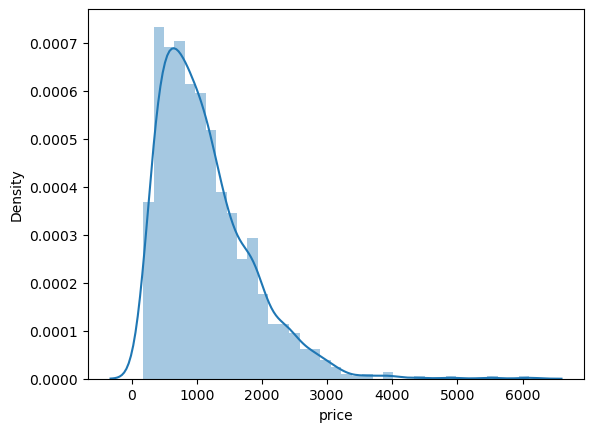

In [620]:
sns.distplot(df['price'])

Observation: It is positively skewed.

## b) Couting the frequency of company

<AxesSubplot:>

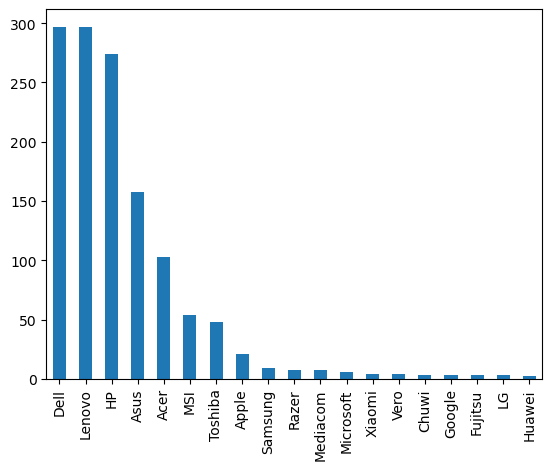

In [621]:
df['Company'].value_counts().plot(kind='bar')

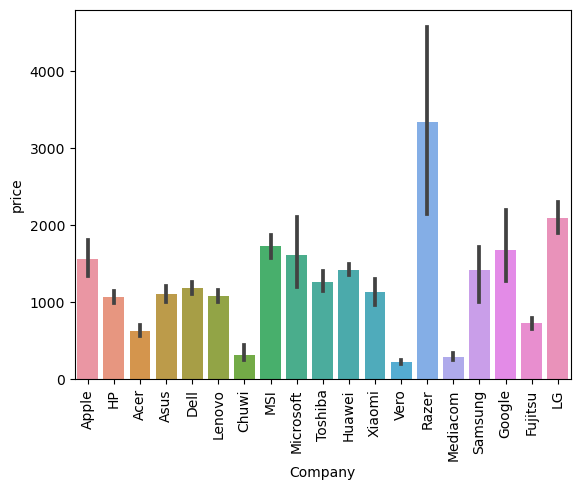

In [622]:
sns.barplot(x=df['Company'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

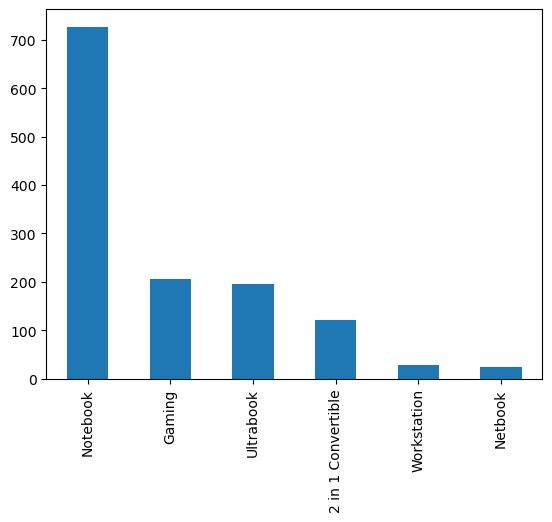

In [623]:
df['TypeName'].value_counts().plot(kind='bar')

Observation: Notebook is the highest sold laptop type

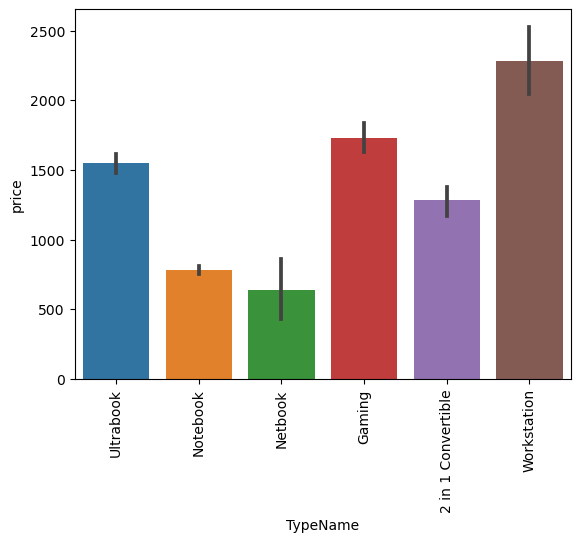

In [624]:
sns.barplot(x=df['TypeName'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Dell\anacondanew\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

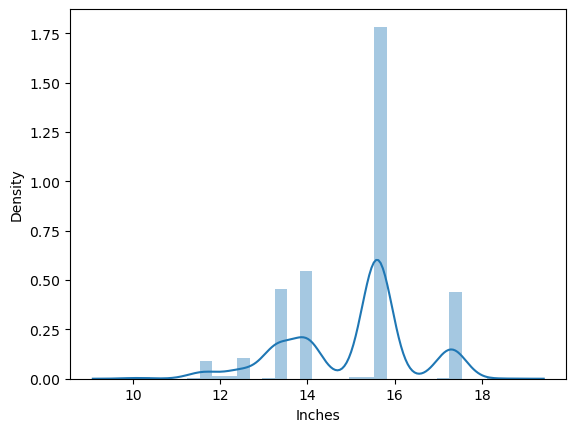

In [625]:
sns.distplot(df['Inches'])

In [626]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [627]:
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price,Touchscreen
690,Acer,Chromebook 14,Notebook,14.0,1366x768,Intel Celeron Dual Core 3855U 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 510,Chrome OS,1.45,375.0,0
532,Asus,Zenbook UX510UW-FI095T,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7500U 2.7GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.00,1299.0,0
807,HP,15-ba043na (A12-9700P/8GB/2TB/W10),Notebook,15.6,1366x768,AMD A12-Series 9700P 2.5GHz,8,2TB HDD,AMD Radeon R7 Graphics,Windows 10,2.04,629.0,0
586,HP,Omen 17-AN010nv,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.78,1498.0,0
584,Dell,Chromebook 11,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.26,295.0,0


<AxesSubplot:>

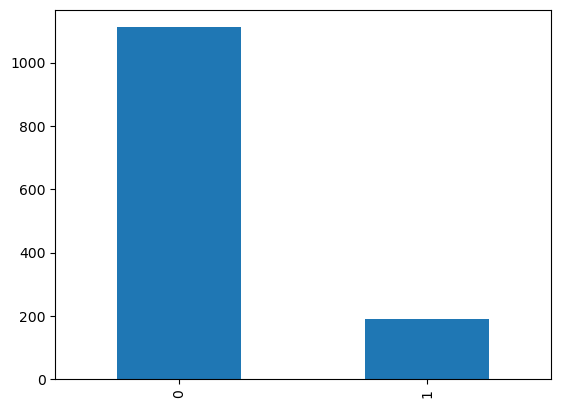

In [628]:
df['Touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Touchscreen', ylabel='price'>

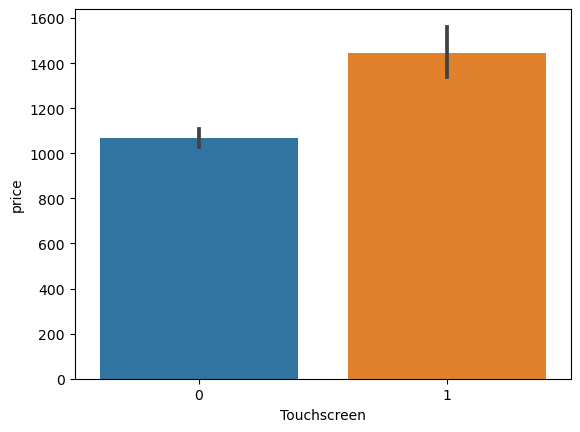

In [629]:
sns.barplot(x=df['Touchscreen'],y=df['price'])

In [630]:
df['IPS_panel']=df['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)

In [631]:
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price,Touchscreen,IPS_panel
398,Dell,Precision M5520,Workstation,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78,2712.0,1,0
1180,Lenovo,ThinkPad X1,2 in 1 Convertible,14.0,IPS Panel Touchscreen 2560x1440,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.36,1637.0,1,1
400,Lenovo,IdeaPad 320-15IAP,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Windows 10,2.20,306.0,0,0
569,Lenovo,ThinkPad L470,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.02,990.0,0,0
1171,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,2.10,1159.0,0,0


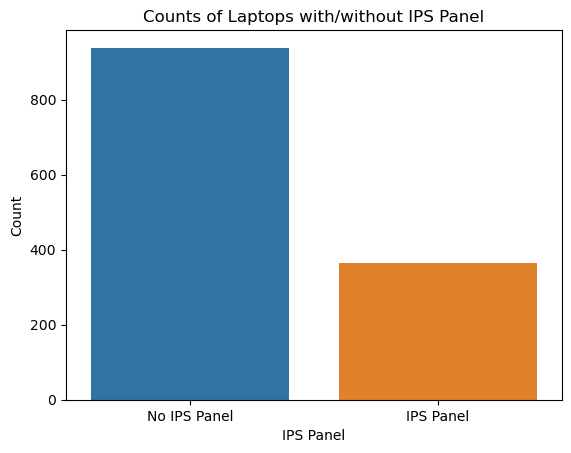

In [632]:
sns.countplot(data=df, x='IPS_panel')
plt.xticks([0, 1], ['No IPS Panel', 'IPS Panel'])
plt.xlabel('IPS Panel')
plt.ylabel('Count')
plt.title('Counts of Laptops with/without IPS Panel')
plt.show()

In [633]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [634]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [635]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [636]:
df.sample(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price,Touchscreen,IPS_panel,X_res,Y_res
383,Lenovo,IdeaPad 720S-14IKB,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.5,1099.0,0,1,1920,1080
668,Toshiba,Tecra Z50-D-10E,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.0,1258.0,0,1,1920,1080
1160,Lenovo,ThinkPad T460,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.7,1499.0,0,0,1920,1080


In [637]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [638]:
df.corr()['price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
price          1.000000
Touchscreen    0.191226
IPS_panel      0.252208
X_res          0.556529
Y_res          0.552809
Name: price, dtype: float64

In [639]:
df['ppi']=(((df['X_res'])**2+(df['Y_res'])**2)**0.5/df['Inches']).astype(float)

In [640]:
df.corr()['price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
price          1.000000
Touchscreen    0.191226
IPS_panel      0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: price, dtype: float64

In [641]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)

In [642]:
df.head()

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,price,Touchscreen,IPS_panel,ppi
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005


## Feature Engineering for CPU brand 

In [643]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [644]:
df['Cpu Name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]) )

In [645]:
df.sample(5)

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,price,Touchscreen,IPS_panel,ppi,Cpu Name
1051,HP,Noteb Pav,Notebook,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 940MX,Windows 10,1.910,979.00,0,1,141.211998,Intel Core i7
670,Microsoft,Surface Laptop,Ultrabook,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel Iris Plus Graphics 640,Windows 10 S,1.252,1867.85,1,0,200.842560,Intel Core i7
300,Asus,VivoBook S14,Notebook,Intel Core i3 7100U 2.4GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.300,509.00,0,0,111.935204,Intel Core i3
497,HP,EliteBook 840,Notebook,Intel Core i7 7600U 2.8GHz,8,1TB SSD,Intel HD Graphics 620,Windows 10,1.480,1749.00,0,0,157.350512,Intel Core i7
511,Acer,Aspire A515-51G,Notebook,Intel Core i7 7500U 2.7GHz,4,500GB HDD,Nvidia GeForce 940MX,Windows 10,2.200,639.00,0,0,141.211998,Intel Core i7


In [646]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    
    elif text.split()[0] == 'Intel':
            return 'Other Intel Processor'
    else:
            return 'AMD Processor'

In [647]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [648]:
df.sample(5)

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,price,Touchscreen,IPS_panel,ppi,Cpu Name,Cpu brand
1281,Dell,Inspiron 3567,Notebook,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R5 M430,Linux,2.30,805.99,0,0,100.454670,Intel Core i7,Intel Core i7
198,HP,Omen 17-W295,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.35,1379.00,0,1,127.335675,Intel Core i7,Intel Core i7
632,Lenovo,V330-15IKB (i5-8250U/4GB/256GB/FHD/W10),Notebook,Intel Core i5 8250U 1.6GHz,4,256GB SSD,Intel UHD Graphics 620,Windows 10,1.80,829.00,0,0,141.211998,Intel Core i5,Intel Core i5
524,Dell,Inspiron 5770,Notebook,Intel Core i5 8250U 1.6GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Linux,2.80,889.00,0,1,127.335675,Intel Core i5,Intel Core i5
631,Dell,Inspiron 7567,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62,1479.00,0,0,141.211998,Intel Core i7,Intel Core i7


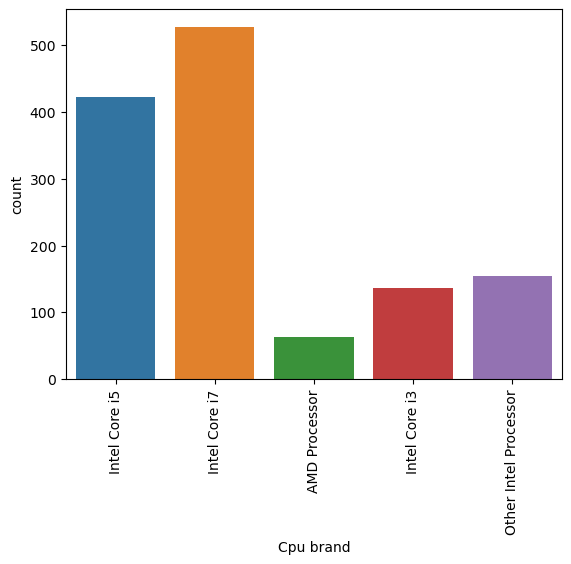

In [649]:
sns.countplot(data=df,x=df['Cpu brand'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

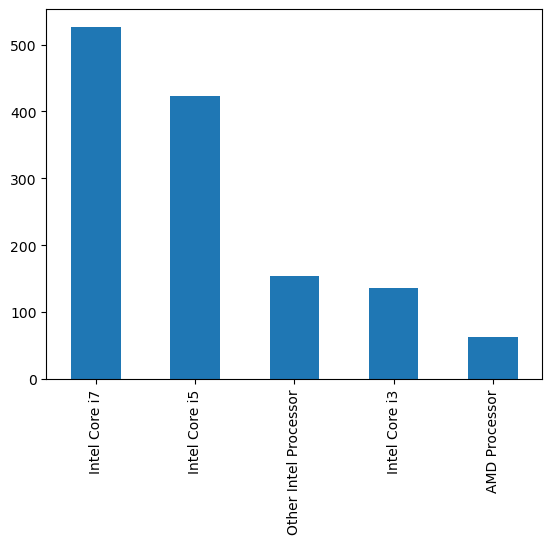

In [650]:
df['Cpu brand'].value_counts().plot(kind='bar')

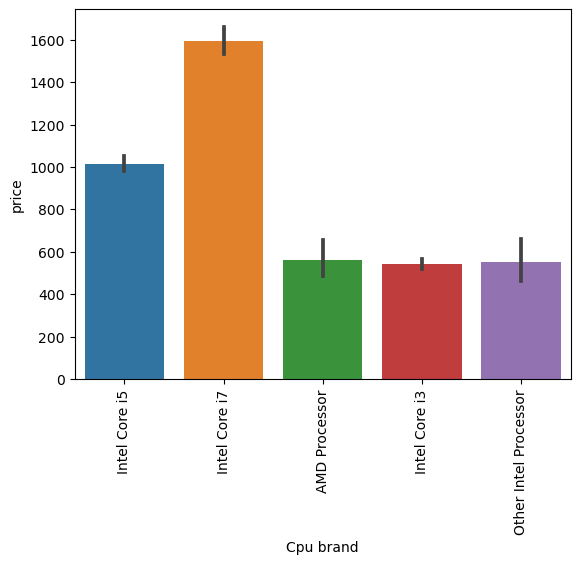

In [651]:
sns.barplot(x=df['Cpu brand'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

In [652]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [653]:
df.sample(5)

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,price,Touchscreen,IPS_panel,ppi,Cpu brand
1098,HP,250 G5,Notebook,4,1TB HDD,Intel HD Graphics 405,Windows 10,1.96,500.00,0,0,100.454670,Other Intel Processor
1282,HP,Stream 11-Y000na,Netbook,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17,209.00,0,0,135.094211,Other Intel Processor
835,Dell,Alienware 15,Gaming,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,3.21,2774.63,0,0,141.211998,Intel Core i7
1021,Toshiba,Portégé Z30-C-16K,Ultrabook,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.20,1590.00,0,0,165.632118,Intel Core i5
214,Huawei,MateBook X,Ultrabook,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.05,1499.00,0,1,199.692071,Intel Core i7


## One hot encoding for Memory

In [654]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [655]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_14504\4023190604.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\Dell\AppData\Local\Temp\ipykernel_14504\4023190604.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [656]:
df.corr()['price']

Ram              0.743007
Weight           0.210370
price            1.000000
Touchscreen      0.191226
IPS_panel        0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: price, dtype: float64

Obeservation: Due to less correlation of Hybrid and Flash_Storage with price we drop it.

In [657]:
df.drop(columns=['Memory','Hybrid','Flash_Storage','Product'],inplace=True)

In [658]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,price,Touchscreen,IPS_panel,ppi,Cpu brand,HDD,SSD
142,Lenovo,Gaming,8,Nvidia GeForce GTX 1050M,No OS,2.40,869.0,0,1,141.211998,Intel Core i7,0,256
1275,Asus,Ultrabook,8,Intel HD Graphics 515,Windows 10,1.20,729.0,0,1,165.632118,Other Intel Processor,0,512
595,Lenovo,Notebook,8,Intel HD Graphics 520,Windows 10,2.29,459.0,0,0,100.454670,Intel Core i3,1000,0
376,Lenovo,Netbook,4,Intel HD Graphics 500,Windows 10,1.59,553.0,0,1,135.094211,Other Intel Processor,0,128
675,MSI,Gaming,16,Nvidia GeForce GTX 1050,Windows 10,2.40,1294.0,0,0,141.211998,Intel Core i7,1000,256


## Feature Engineering for Gpu Brand 

In [659]:
df['Gpu Brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [660]:
df['Gpu Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu Brand, dtype: int64

In [661]:
df=df[df['Gpu Brand']!='ARM']

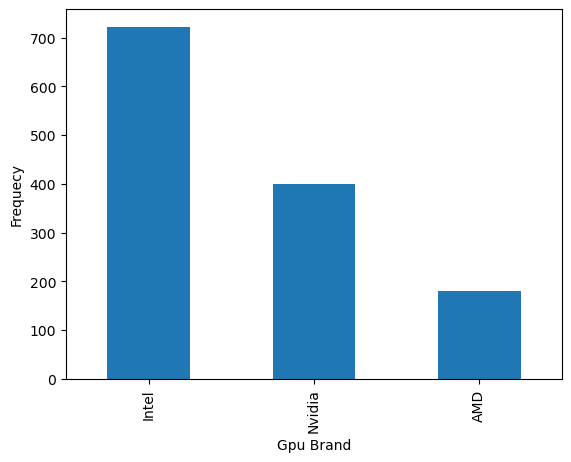

In [662]:
df['Gpu Brand'].value_counts().plot(kind='bar')
plt.xlabel('Gpu Brand')
plt.ylabel('Frequecy')
plt.show()

<AxesSubplot:xlabel='Gpu Brand', ylabel='price'>

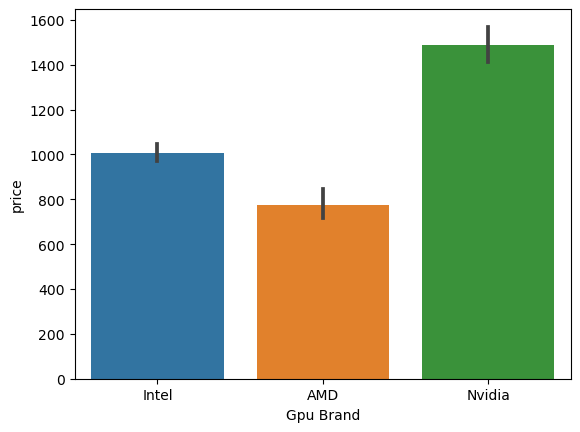

In [663]:
sns.barplot(x=df['Gpu Brand'],y=df['price'])

In [664]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,price,Touchscreen,IPS_panel,ppi,Cpu brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel


## Feature Engineering for OS 

In [665]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [666]:
df['os']=df['OpSys'].apply(cat_os)

In [667]:
df.drop(columns=['OpSys','Gpu'],inplace=True)

In [668]:
df.head()

,Company,TypeName,Ram,Weight,price,Touchscreen,IPS_panel,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [669]:
df['os'].value_counts()

Windows               1125
Others/No OS/Linux     156
Mac                     21
Name: os, dtype: int64

<AxesSubplot:xlabel='os', ylabel='price'>

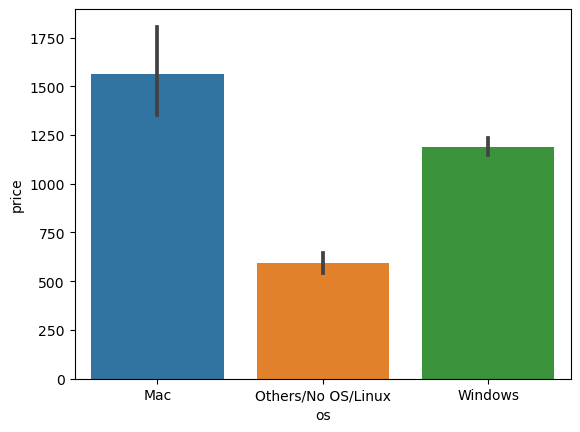

In [670]:
sns.barplot(x=df['os'],y=df['price'])

## Relation between Weight and price

<AxesSubplot:xlabel='Weight', ylabel='price'>

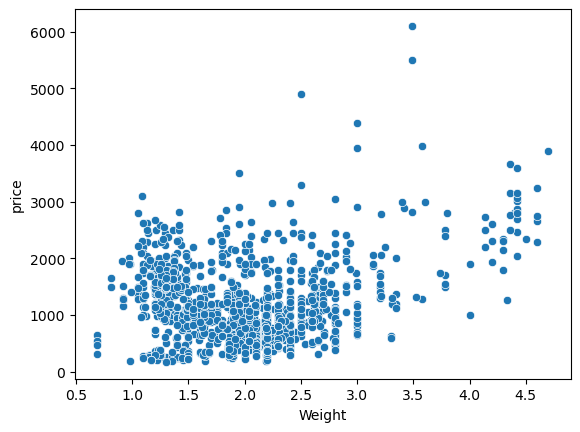

In [671]:
sns.scatterplot(x=df['Weight'],y=df['price'])

## Correlation of all columns

<AxesSubplot:>

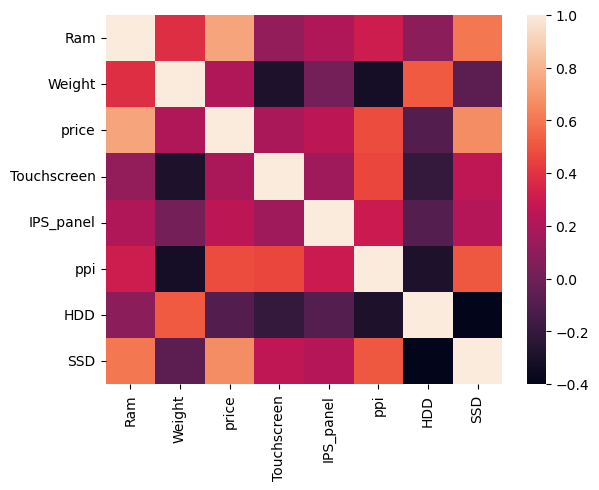

In [672]:
sns.heatmap(df.corr())